<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold
from sklearn.base import clone
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from scipy.stats import norm, skew  # for some statistics

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Read Dataset</h1>**

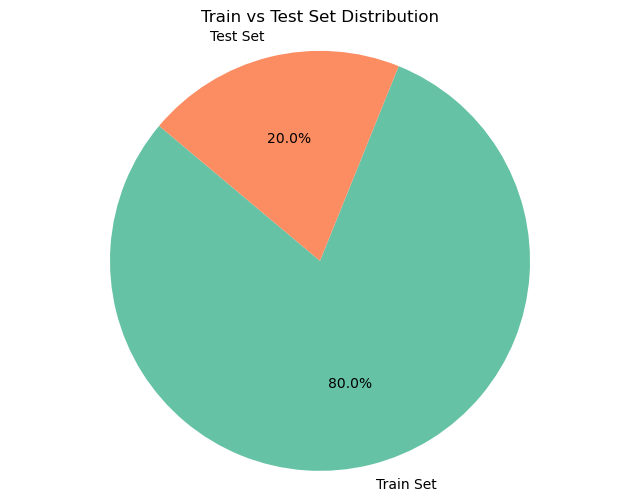

/tmp/ipykernel_56481/2309727063.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette=['#66c2a5', '#fc8d62'])


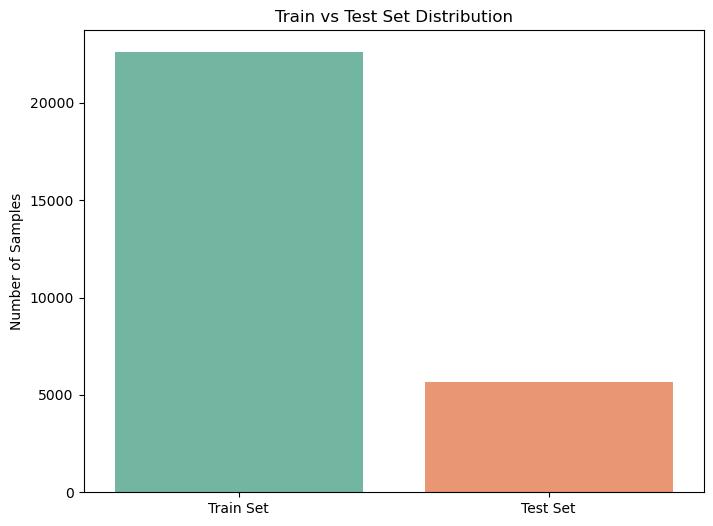

In [5]:
train = pd.read_csv('/home/danny/Downloads/yield_df.csv')

# Split the dataset into training and test sets
train, test = train_test_split(train, test_size=0.2, random_state=42)

# Calculate the sizes of the training and test sets
sizes = [len(train), len(test)]
labels = ['Train Set', 'Test Set']

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Train vs Test Set Distribution')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

# Alternatively, plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=sizes, palette=['#66c2a5', '#fc8d62'])
plt.title('Train vs Test Set Distribution')
plt.ylabel('Number of Samples')
plt.show()

<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">EDA</h1>**

### <span style="font-size:28px;">Process and Methods of Exploratory Data Analysis</span>

### <span style="font-size:20px;">1.Check for Missing Values</span>

### <span style="font-size:20px;">2.View Column Data Types</span>

### <span style="font-size:20px;">3.plots of feature</span>

### <span style="font-size:20px;">4.Value Conversion</span>

### <span style="font-size:20px;">5.Feature Transformation or Creation</span>

### <span style="font-size:20px;">6.Calculate Skewness and Kurtosis</span>

### <span style="font-size:20px;">7.Target distribution</span>

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">1.Check for Missing Values</span>

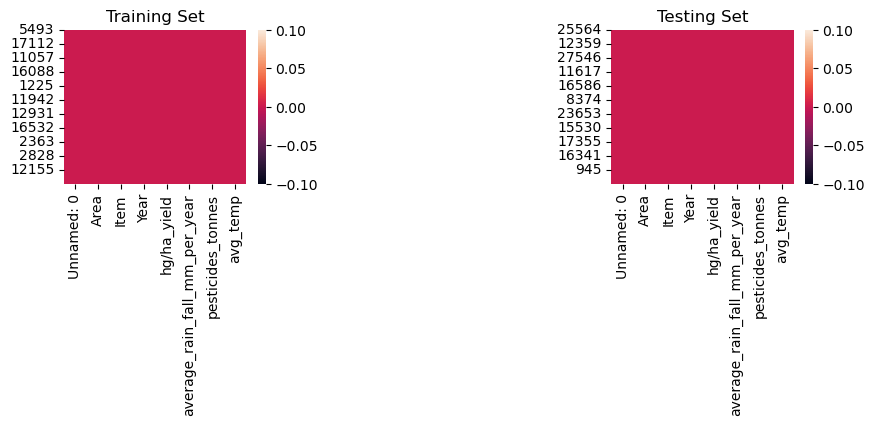

In [9]:
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.heatmap(test.isnull())
plt.show()

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">2.View Column Data Types</span>

In [12]:
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Index: 22593 entries, 5493 to 23654
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     22593 non-null  int64  
 1   Area                           22593 non-null  object 
 2   Item                           22593 non-null  object 
 3   Year                           22593 non-null  int64  
 4   hg/ha_yield                    22593 non-null  int64  
 5   average_rain_fall_mm_per_year  22593 non-null  float64
 6   pesticides_tonnes              22593 non-null  float64
 7   avg_temp                       22593 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.6+ MB


None

test
<class 'pandas.core.frame.DataFrame'>
Index: 5649 entries, 25564 to 3877
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5649 non-null   int64  
 1   Area                           5649 non-null   object 
 2   Item                           5649 non-null   object 
 3   Year                           5649 non-null   int64  
 4   hg/ha_yield                    5649 non-null   int64  
 5   average_rain_fall_mm_per_year  5649 non-null   float64
 6   pesticides_tonnes              5649 non-null   float64
 7   avg_temp                       5649 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 397.2+ KB


None

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">3.plots of feature</span>

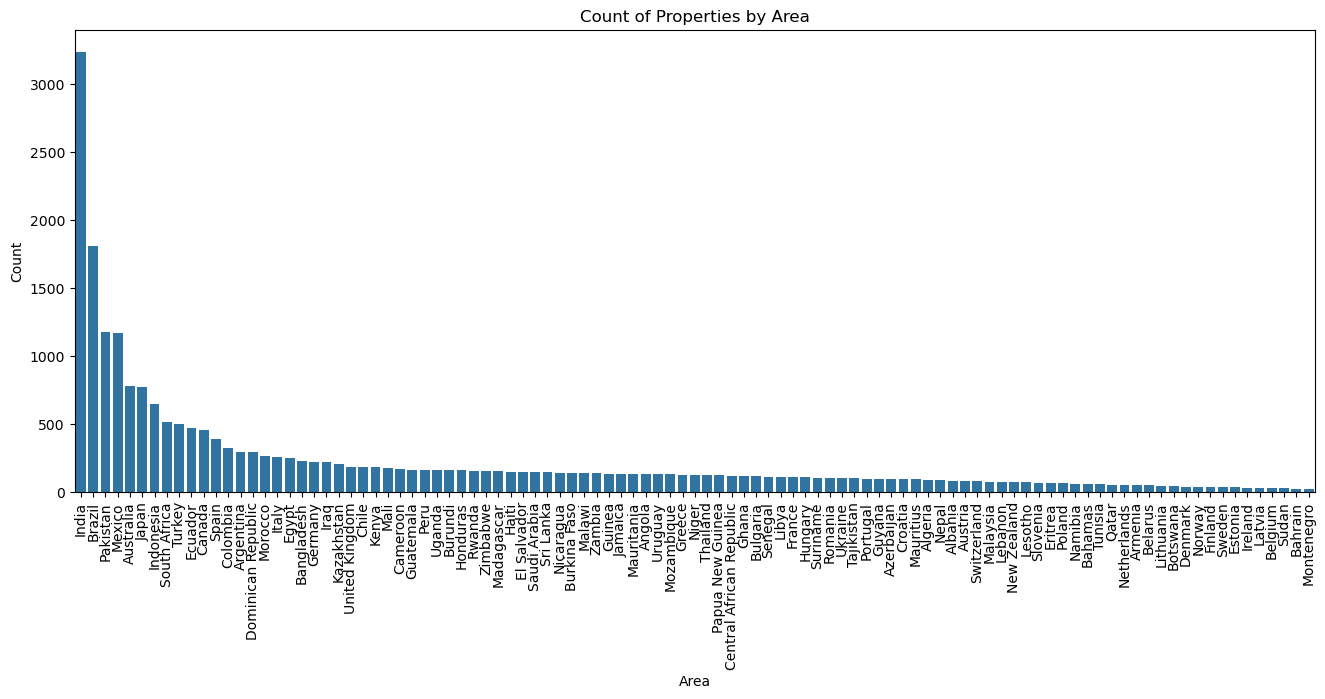

In [15]:
# Calculate the count of occurrences for each area
area_counts = train['Area'].value_counts()

# Plot the bar chart
plt.figure(figsize=(16, 6))  # Set the figure size
sns.barplot(x=area_counts.index, y=area_counts.values)  # Create the bar plot
plt.title('Count of Properties by Area')  # Set the title
plt.xlabel('Area')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

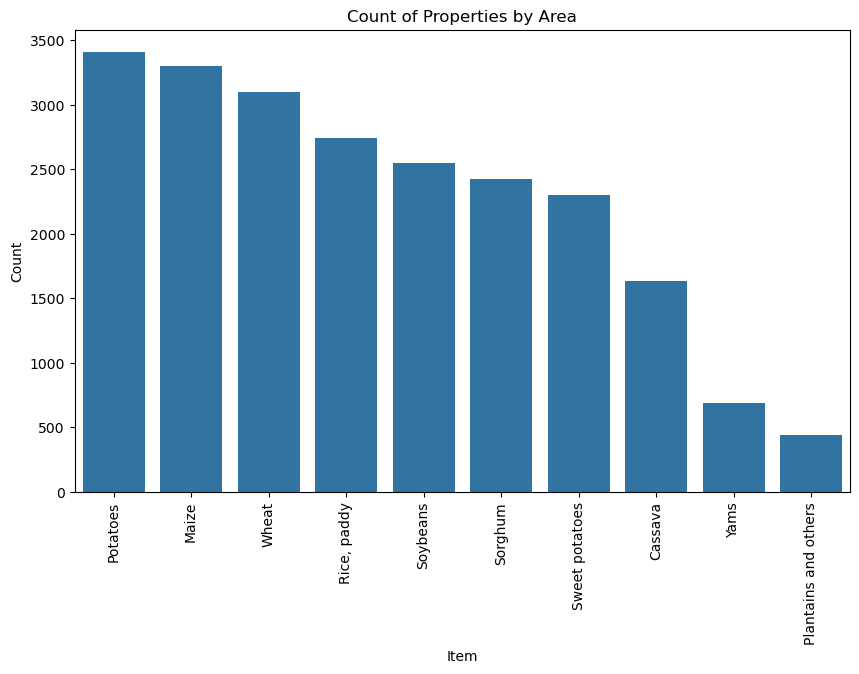

In [16]:
# Calculate the count of occurrences for each area
area_counts = train['Item'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=area_counts.index, y=area_counts.values)  # Create the bar plot
plt.title('Count of Properties by Area')  # Set the title
plt.xlabel('Item')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">4.Value Conversion</span>

### <span style="font-size:28px;">Step</span>

### <span style="font-size:20px;">1.Concatenate train and test (without their target columns).</span>

### <span style="font-size:20px;">2.Apply the transformation on object columns.</span>

### <span style="font-size:20px;">3.Separate the transformed datasets back into train and test.</span>

### <span style="font-size:20px;">4.Reattach the target variable (hg/ha_yield) to both datasets.</span>

In [21]:
train= train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Remove the target variable 'hg/ha_yield' from both train and test
train_target = train['hg/ha_yield']
test_target = test['hg/ha_yield']
train_data = train.drop(columns=['hg/ha_yield'])
test_data = test.drop(columns=['hg/ha_yield'])

# Combine train and test datasets (without the target)
combined = pd.concat([train_data, test_data], axis=0)

# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through each column in the combined dataset and apply transformation to 'object' columns
for column in combined.columns:
    if combined[column].dtype == 'object':
        combined[column] = le.fit_transform(combined[column])

# Split the combined data back into train and test sets
train_data_transformed = combined.iloc[:len(train_data), :]
test_data_transformed = combined.iloc[len(train_data):, :]

# Add the target column back to both transformed datasets
train_transformed = pd.concat([train_data_transformed, train_target.reset_index(drop=True)], axis=1)
test_transformed = pd.concat([test_data_transformed, test_target.reset_index(drop=True)], axis=1)

# Check the transformed datasets

train = train_transformed.copy()
test = test_transformed.copy()
display(train.head())
display(test.head())

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,5493,18,5,2005,1604.0,829.59,25.36,13173
1,10969,42,6,1992,1083.0,70791.00,25.91,8947
2,2001,8,0,1997,1292.0,484.59,25.81,75317
3,22157,73,3,1997,494.0,16936.00,23.76,112295
4,311,2,7,2005,1010.0,40.00,24.41,46159


,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,25564,85,4,2008,636.0,40719.00,17.21,69220
1,18113,56,8,1996,1513.0,152.01,19.71,20000
2,25607,85,5,2010,636.0,39043.00,16.51,51206
3,6815,22,3,2007,3240.0,82439.06,27.45,166986
4,18144,56,7,2000,1513.0,130.46,19.65,56319


In [23]:
train = train.drop(columns=['Unnamed: 0'])
test = test.drop(columns=['Unnamed: 0'])

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">5.Feature Transformation or Creation</span>

<span style="font-family: newtimeroman; font-size: 150%; color: blue;">I've tested log transformation, StandardScaler, and adding new features, and ultimately found that adding average features resulted in the best outcome.</span>

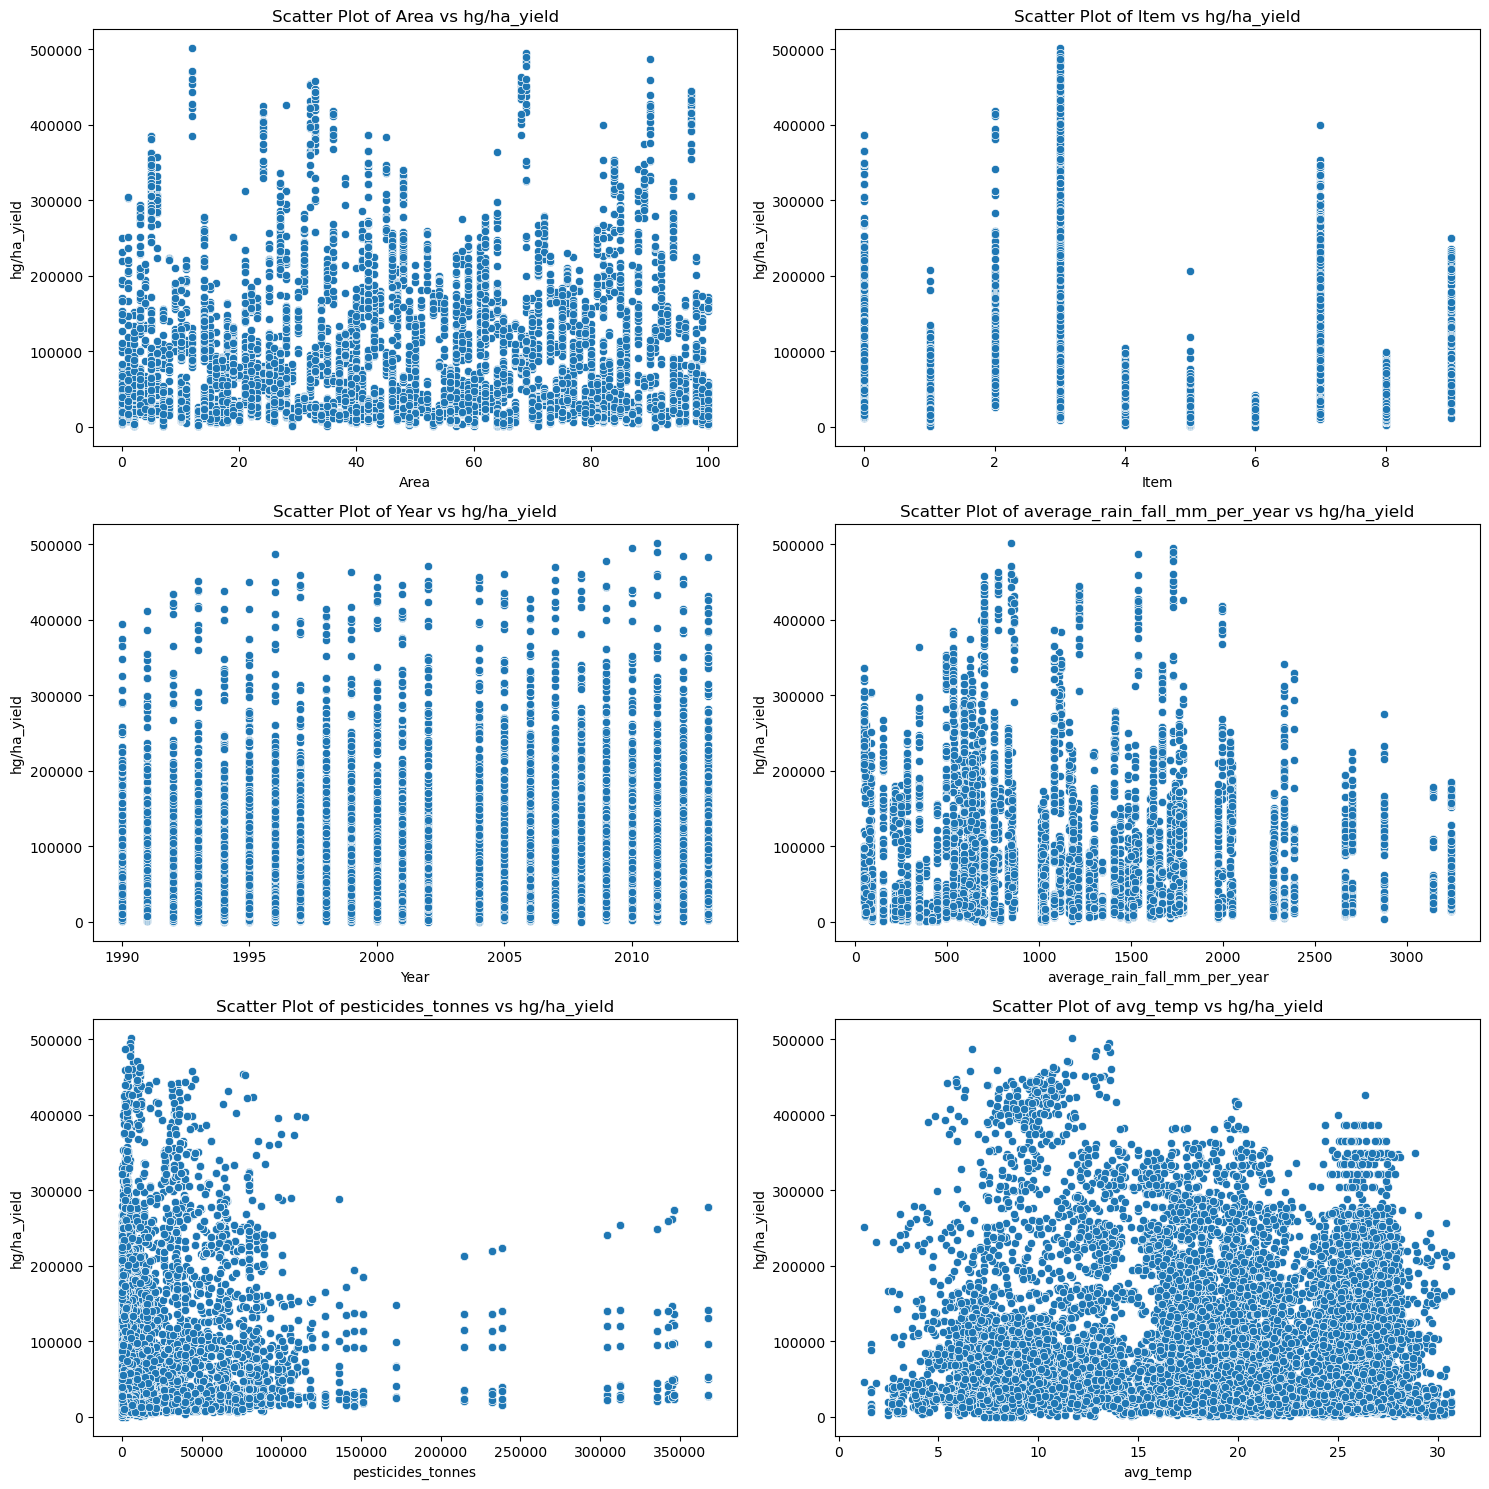

In [27]:
# Plot scatter plots for all columns
target_variable = 'hg/ha_yield'
features = train.columns.drop(target_variable)

# Set up the layout of the plots
n_features = len(features)
n_cols = 2  # Number of columns per row
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows

plt.figure(figsize=(15, n_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=train[feature], y=train[target_variable])
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')  # Set title for each plot
    plt.xlabel(feature)  # Label for x-axis
    plt.ylabel(target_variable)  # Label for y-axis

plt.tight_layout()  # Automatically adjust subplot spacing
plt.show()  # Display all plots


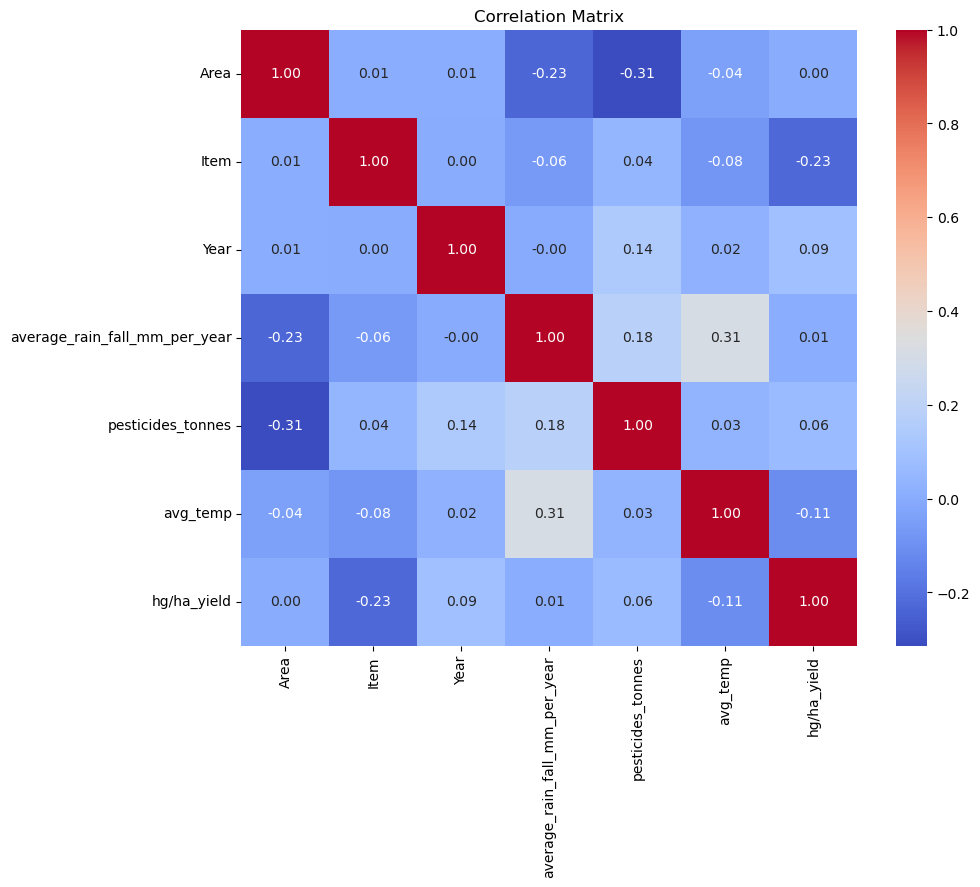

In [28]:
# Calculate the correlation matrix
correlation_matrix = train.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Apply log transformation to specified columns in the `train` DataFrame
#train['pesticides_tonnes_log'] = np.log1p(train['pesticides_tonnes'])

# Apply log transformation to specified columns in the `test` DataFrame
#test['pesticides_tonnes_log'] = np.log1p(test['pesticides_tonnes'])

#train = train.drop(columns=['pesticides_tonnes'])
#test = test.drop(columns=['pesticides_tonnes'])

In [31]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#train[['Area', 'Item', 'Year']] = scaler.fit_transform(train[['Area', 'Item', 'Year']])
#test[['Area', 'Item', 'Year']] = scaler.fit_transform(test[['Area', 'Item', 'Year']])

In [35]:
train['average_temp'] = (train['avg_temp'] + train['average_rain_fall_mm_per_year']) / 2
test['average_temp'] = (test['avg_temp'] + test['average_rain_fall_mm_per_year']) / 2

train = train.drop(columns=['avg_temp','average_rain_fall_mm_per_year'])
test = test.drop(columns=['avg_temp','average_rain_fall_mm_per_year'])

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">6.Calculate Skewness and Kurtosis</span>

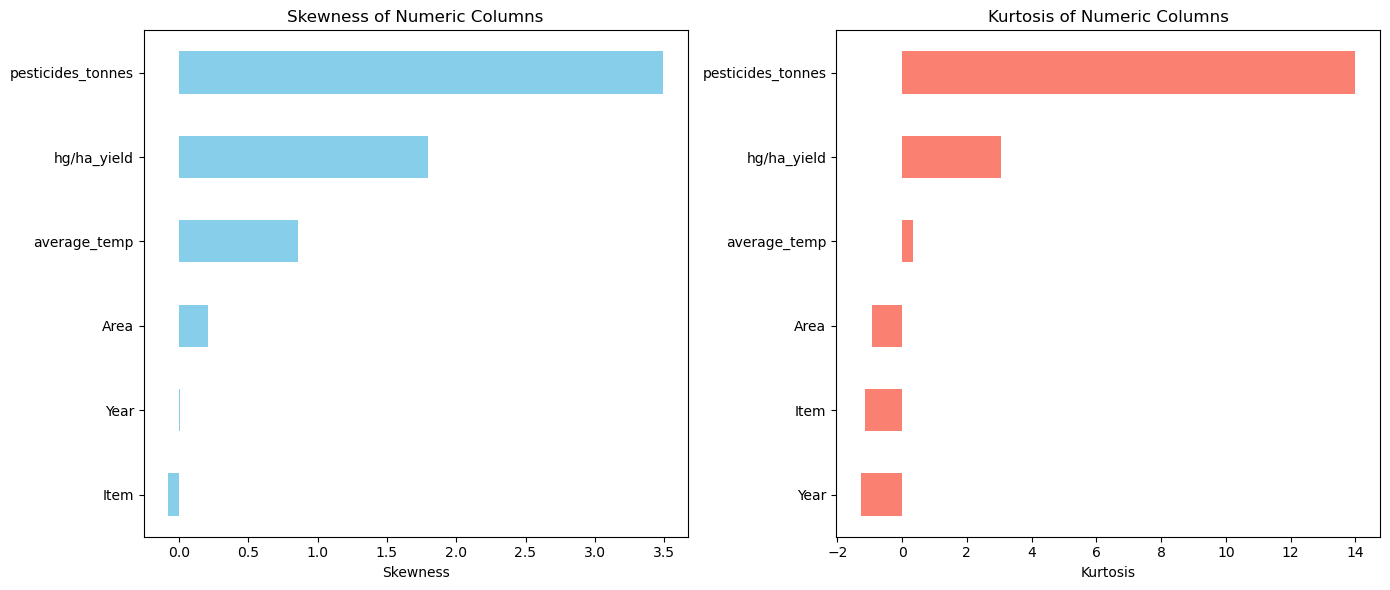

In [38]:
numeric_df = train.select_dtypes(include=['number'])
skewness = numeric_df.skew()
kurtosis = numeric_df.kurtosis()

# Combine results into a DataFrame
result = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

# Plot Skewness
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
result['Skewness'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Skewness of Numeric Columns')
plt.xlabel('Skewness')

# Plot Kurtosis
plt.subplot(1, 2, 2)
result['Kurtosis'].sort_values().plot(kind='barh', color='salmon')
plt.title('Kurtosis of Numeric Columns')
plt.xlabel('Kurtosis')

plt.tight_layout()
plt.show()

In [40]:
X= train.drop(columns=["hg/ha_yield"],axis=1)
y= train["hg/ha_yield"]

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">7.Target distribution</span>

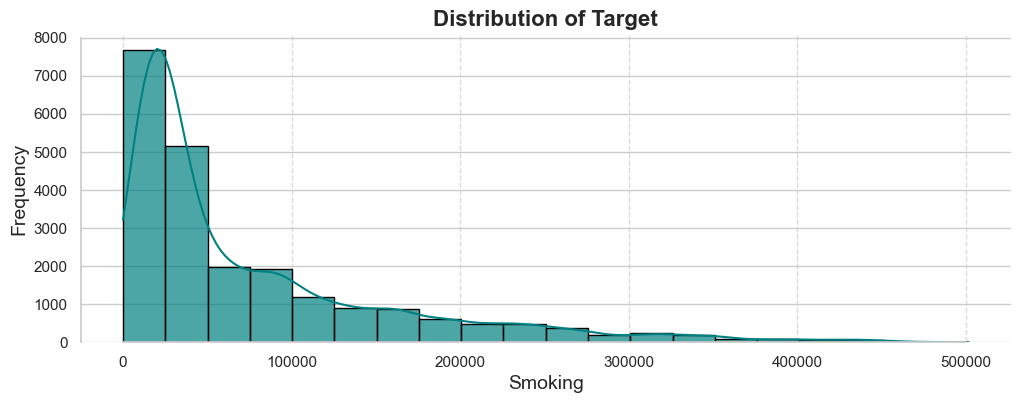

Skewness: 1.793258
Kurtosis: 3.066628


In [43]:
# Set the style for the plots
sns.set(style="whitegrid")  # Use a white grid background
sns.set_palette("pastel")  # Use a soft color palette

# Create the figure and axis
f, ax = plt.subplots(figsize=(12, 4))  # Increase figure size to show more details

# Plot the histogram with a KDE curve
sns.histplot(y, kde=True, color="teal", bins=20, alpha=0.7, edgecolor="black")

# Set the title and axis labels
ax.set_title('Distribution of Target', fontsize=16, weight='bold')  # Title with bold font
ax.set_xlabel('Smoking', fontsize=14)  # X-axis label
ax.set_ylabel('Frequency', fontsize=14)  # Y-axis label

# Add grid lines to the x-axis
ax.xaxis.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines with some transparency

# Remove the top and right spines (borders) of the plot
sns.despine(trim=True)

# Display the plot
plt.show()

# Calculate and print skewness and kurtosis
print("Skewness: %f" % y.skew())  # Measure of asymmetry in the data
print("Kurtosis: %f" % y.kurt())  # Measure of the tails' heaviness in the data


In [45]:
X_train=X
y_train=y

<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Modeling</h1>**

### <span style="font-size:20px;">1.Initialize Regressor</span>

### <span style="font-size:20px;">2.VotingRegressor</span>

### <span style="font-size:20px;">3.StackingRegressor</span>

### <span style="font-size:20px;">4.Ensemble Regressor</span>


<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">1.Initialize Regressor</span>

In [50]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [51]:
# Initialize regressors with moderate complexity
reg1 = GradientBoostingRegressor(n_estimators=10)
reg2 = LGBMRegressor(n_estimators=10)
reg3 = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
reg4 = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
reg5 = XGBRegressor(n_estimators=10, max_depth=6, eval_metric='rmse')
reg6 = RandomForestRegressor(n_estimators=10)
reg7 = ExtraTreesRegressor(n_estimators=10)
reg8 = DecisionTreeRegressor()
reg9 = CatBoostRegressor(logging_level='Silent', n_estimators=10)

# Fit the regressors
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)
reg8.fit(X_train, y_train)
reg9.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 5
[LightGBM] [Info] Start training from score 77051.197760


<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">2.VotingRegressor</span>

In [54]:
from sklearn.ensemble import VotingRegressor

# Create a VotingRegressor using the regressors
voting_model = VotingRegressor(
    estimators=[("gb", reg1), ("lgbm", reg2), ("bag", reg3), ("ada", reg4), ("xgb", reg5), 
                ("rf", reg6), ("et", reg7), ("dt", reg8), ("cat", reg9)]
)

# Fit the voting regressor
voting_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 5
[LightGBM] [Info] Start training from score 77051.197760


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(n_estimators=10)),
                            ('lgbm', LGBMRegressor(n_estimators=10)),
                            ('bag',
                             BaggingRegressor(estimator=DecisionTreeRegressor())),
                            ('ada',
                             AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                               n_estimators=10)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsampl...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=10,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('rf', RandomForestRegressor(n_estimators=10)),
                            ('et', ExtraTreesRegressor(n_estimators=10)),
                            ('dt', DecisionTreeRegressor()),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x782d7e92ebd0>)])

<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">3.StackingRegressor</span>

In [56]:
n_folds = 5

# K-Fold Cross-Validation for regression models
def rmse_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=2024).get_n_splits(X)
    rmse = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=kf)
    return -rmse  # Convert to positive RMSE

# Stacking Regressor
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X, y):
        self.base_models_ = [clone(model) for model in self.base_models]
        for model in self.base_models_:
            model.fit(X, y)

        # Create meta features based on predictions of base models
        meta_features = np.column_stack([model.predict(X) for model in self.base_models_])
        self.meta_model.fit(meta_features, y)
        return self

    def predict(self, X):
        base_predictions = np.column_stack([model.predict(X) for model in self.base_models_])
        # Use the meta model to make final predictions
        return self.meta_model.predict(base_predictions)


<span style="font-family: newtimeroman; font-size: 200%; color: darkblue;">4.Ensemble Regressor</span>

In [58]:
# First-level Stacked Models
Ensemble_models = AveragingModels(
    base_models=[reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9],  
    meta_model=VotingRegressor(estimators=[("reg1", reg1), ("reg2", reg2), ("reg3", reg3),
                                            ("reg4", reg4), ("reg5", reg5), ("reg6", reg6),
                                            ("reg7", reg7), ("reg8", reg8), ("reg9", reg9)])
)

# Fit the stacked model
Ensemble_model = Ensemble_models.fit(X_train, y_train)

# To evaluate the model using cross-validation
Ensemble_scores = cross_val_score(Ensemble_model, X_train, y_train, scoring='neg_mean_squared_error', cv=n_folds)
Ensemble_rmse = np.sqrt(-Ensemble_scores)
print(f'Ensemble Model RMSE: {Ensemble_rmse.mean()} ± {Ensemble_rmse.std()}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 5
[LightGBM] [Info] Start training from score 77051.197760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1997
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 9
[LightGBM] [Info] Start training from score 77051.197760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 18074, number of used features: 5
[LightGBM] [Info] Start 

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Predict </h1>**

In [61]:
X_test= test.drop(columns=["hg/ha_yield"],axis=1)
y_test= test["hg/ha_yield"]

In [62]:
#predict test
Ensemble_predict=Ensemble_model.predict(X_test)

In [63]:
Ensemble_predict_df = pd.DataFrame(Ensemble_predict, columns=['Ensemble_pred'])

# Merge predictions with the test DataFrame
test_pred = X_test.merge(Ensemble_predict_df, how='inner', left_index=True, right_index=True)
test_pred

,Area,Item,Year,pesticides_tonnes,average_temp,Ensemble_pred
0,85,4,2008,40719.00,326.605,70788.912020
1,56,8,1996,152.01,766.355,28675.066234
2,85,5,2010,39043.00,326.255,53211.576640
3,22,3,2007,82439.06,1633.725,158723.116203
4,56,7,2000,130.46,766.325,60379.596315
...,...,...,...,...,...,...
5644,84,8,2007,26857.00,258.035,32712.187486
5645,18,0,2007,918.88,814.745,110974.849503
5646,42,0,1995,61257.00,554.275,238322.091563
5647,48,1,2002,70262.54,840.710,28719.565275


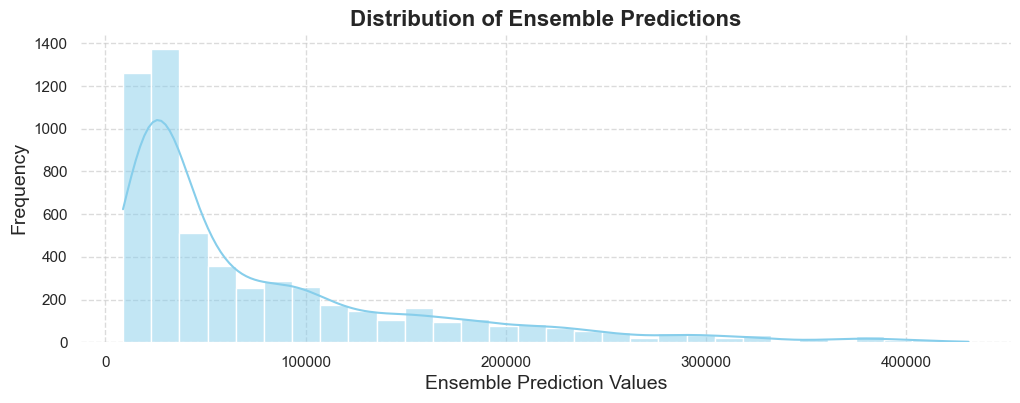

In [64]:
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(12, 4))

sns.histplot(test_pred['Ensemble_pred'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Ensemble Predictions', fontsize=16, weight='bold')
plt.xlabel('Ensemble Prediction Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine(trim=True, left=True, bottom=True)

plt.show()

RMSE: 11236.2993
MAE: 6891.4903
R²: 0.9826


/tmp/ipykernel_56481/249465450.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Metric', data=metrics, palette='viridis')


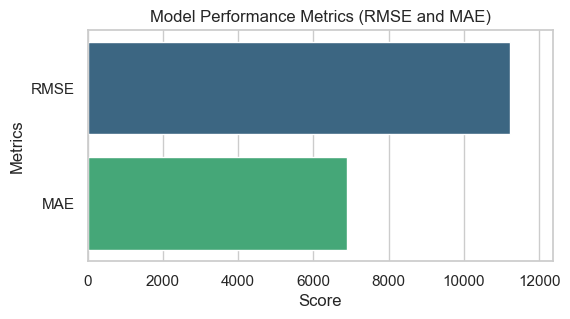

/tmp/ipykernel_56481/249465450.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['R²'], x=[r2], palette='viridis')


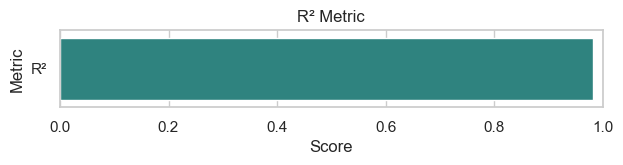

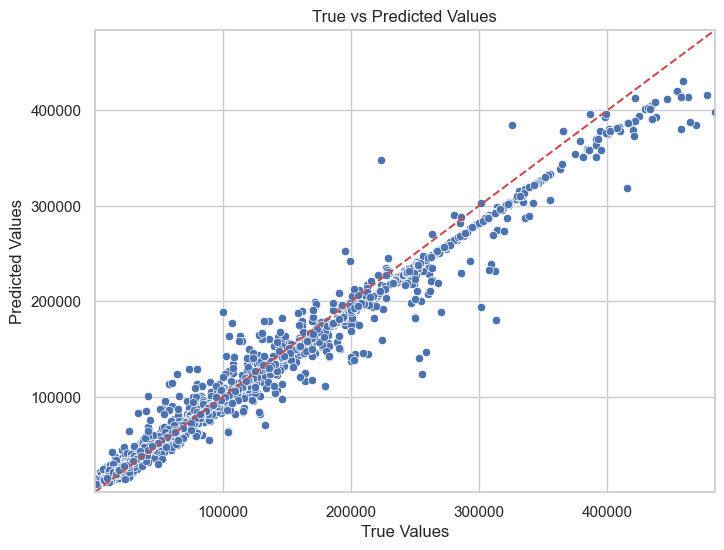

In [65]:
# Assuming test_pred and y_test are already defined
y_true = y_test
y_pred = test_pred['Ensemble_pred']

# Calculate regression metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Organize into a DataFrame without MSE
metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE'],
    'Score': [rmse, mae]
})

# Print the metrics
for index, row in metrics.iterrows():
    print(f"{row['Metric']}: {row['Score']:.4f}")

# Print the R² score
print(f"R²: {r2:.4f}")

# Visualization for RMSE and MAE
plt.figure(figsize=(6, 3))
sns.barplot(x='Score', y='Metric', data=metrics, palette='viridis')
plt.title('Model Performance Metrics (RMSE and MAE)')
plt.xlabel('Score')
plt.ylabel('Metrics')
plt.xlim(0, max(metrics['Score']) * 1.1)  # Adjust x-axis limit for better visibility
plt.show()

# Visualization for R²
plt.figure(figsize=(7, 1))  # Increase height to ensure visibility
sns.barplot(y=['R²'], x=[r2], palette='viridis')  
plt.title('R² Metric')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.xlim(0, 1)  
plt.show()

# Residuals plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred)  
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # 45-degree line
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xlim(y_true.min(), y_true.max())
plt.ylim(y_true.min(), y_true.max())
plt.show()


In [72]:
import pickle
from sklearn.ensemble import RandomForestRegressor  # Example algorithm

# Assuming X_train and y_train are your data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model to a file using pickle
with open('crop_yield_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [74]:
import tkinter as tk
from tkinter import messagebox
import pickle
import pandas as pd

# Load the trained model
with open('crop_yield_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Function to make a prediction
def predict_yield():
    try:
        # Get the input values from the entry boxes
        feature_1 = float(entry_feature_1.get())
        feature_2 = float(entry_feature_2.get())
        feature_3 = float(entry_feature_3.get())
        # Add as many features as required by your model

        # Create a DataFrame from the inputs
        input_data = pd.DataFrame([[feature_1, feature_2, feature_3]], columns=['feature_1', 'feature_2', 'feature_3'])

        # Make the prediction using the loaded model
        prediction = model.predict(input_data)[0]

        # Show the result in the label
        result_label.config(text=f"Predicted Crop Yield: {prediction:.2f}")
    
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create the main window
root = tk.Tk()
root.title("Crop Yield Prediction")

# Add a label for the title
title_label = tk.Label(root, text="Enter Crop Data for Prediction", font=("Arial", 16))
title_label.pack(pady=10)

# Create labels and entry widgets for each feature
label_feature_1 = tk.Label(root, text="Feature 1:")
label_feature_1.pack()
entry_feature_1 = tk.Entry(root)
entry_feature_1.pack()

label_feature_2 = tk.Label(root, text="Feature 2:")
label_feature_2.pack()
entry_feature_2 = tk.Entry(root)
entry_feature_2.pack()

label_feature_3 = tk.Label(root, text="Feature 3:")
label_feature_3.pack()
entry_feature_3 = tk.Entry(root)
entry_feature_3.pack()

# Add more features as required by your model here

# Create the "Predict" button
predict_button = tk.Button(root, text="Predict", command=predict_yield)
predict_button.pack(pady=10)

# Create a label to display the result
result_label = tk.Label(root, text="Predicted Crop Yield: N/A", font=("Arial", 14))
result_label.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()
